In [ ]:
!pip install requests_html

In [1]:
import random
import requests
from requests_html import HTMLSession
from requests_html import HTML
import os
import json

import w3lib.html
import datetime
import string
import calendar
import html
import locale 

# 1. _Crawling_: Extracción de URLs

In [2]:
URL_SEED = 'https://www.ciperchile.cl/page/1/?s'

XPATH_HREF = "//h4['common-box__title']//a/@href"

In [3]:
class Crawler:
    
    USER_AGENT_LIST = [
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/22.0.1207.1 Safari/537.1",
        "Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57 Safari/536.11",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1092.0 Safari/536.6",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1090.0 Safari/536.6",
        "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/19.77.34.5 Safari/537.1",
        "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.9 Safari/536.5",
        "Mozilla/5.0 (Windows NT 6.0) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.36 Safari/536.5",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.0 Safari/536.3",
        "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24",
        "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24"
]

    #Ruta XPATH hacia los enlaces que queremos recopilar
    xpath_href=XPATH_HREF

    #variable que permite listar todos los enlaces recopilado
    url_list = []
    
    def _init_(self):
        pass
    
    def get(self,url):
        session = HTMLSession()
        header = dict()
        header['user-agent'] = random.choice(self.USER_AGENT_LIST)
        response = session.get(url,headers=header)        
        return response
    
    def parse(self, response):
        self.url_list = []
        urls = response.html.xpath(self.xpath_href)
        for url in urls:
            self.url_list.append(url)

In [ ]:
crawler = Crawler()

response = crawler.get(URL_SEED)

In [ ]:
response.content

In [ ]:
crawler.parse(response)

In [ ]:
crawler.url_list

# 2. _Scraping_ de datos web: extracción de datos

In [ ]:
URL_NEWS ="https://www.ciperchile.cl/2008/06/05/los-autocontratos-que-tienen-en-la-mira-a-la-facultad-de-economia-de-la-u-de-chile/"

In [10]:
XPATH_TITLE = "//article//h1"
XPATH_CONTENT ="//section[@class='horizon--bottom container']//p"
XPATH_DATE = "//p[@class='common-box__date']"

In [11]:
class Scraper:
    
    USER_AGENT_LIST = [
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/22.0.1207.1 Safari/537.1",
        "Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57 Safari/536.11",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1092.0 Safari/536.6",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1090.0 Safari/536.6",
        "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/19.77.34.5 Safari/537.1",
        "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.9 Safari/536.5",
        "Mozilla/5.0 (Windows NT 6.0) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.36 Safari/536.5",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.0 Safari/536.3",
        "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24",
        "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24"
    ]

    query_extract_title = XPATH_TITLE
    query_extract_text =  XPATH_CONTENT
    query_extract_date = XPATH_DATE

    def _init_(self):
        pass
   
    def get(self,url):
        headers = {'user-agent':random.choice(self.USER_AGENT_LIST) }
        session = HTMLSession()
        response = session.get(url,headers=headers) 
        #print(response.html.xpath(self.query_extract_title)[0].text)
        return response
    
    def clean_text(self, html_text):
        text_without_tags = w3lib.html.remove_tags(html_text)
        text_without_escape_chars = w3lib.html.replace_escape_chars(text_without_tags)
        text_without_escape_chars = html.unescape(text_without_escape_chars)
        text_without_whitespace = text_without_escape_chars.strip()
        return text_without_whitespace

    def replace_month_name_to_number(self,date_string):
        lower_string = date_string.lower()
        for month_id in range(1, 13):
            if(lower_string.find(calendar.month_name[month_id].lower())!=-1):
                if(month_id>=10):
                    return (lower_string.replace(calendar.month_name[month_id].lower(),str(month_id)))
                else:
                    return (lower_string.replace(calendar.month_name[month_id].lower(),"0"+str(month_id)))
            if(lower_string.find(calendar.month_abbr[month_id].lower())!=-1):
                if(month_id>=10):
                    return (lower_string.replace(calendar.month_abbr[month_id].lower(),str(month_id)))
                else:
                    return (lower_string.replace(calendar.month_abbr[month_id].lower(),"0"+str(month_id)))
                    
    def format_date(self,date):
        temp_date = datetime.datetime.strptime(date, '%d.%m.%Y')
        year_month_day_format = datetime.date.strftime(temp_date, "%Y-%m-%d")
        date = year_month_day_format  
        return(date)
    
    #### main function ####
    def parse(self, response):
        
        #URL
        self.news_url = response.url
        
        #TITLE
        self.news_title = response.html.xpath(self.query_extract_title)[0].text
        self.news_title = self.clean_text(self.news_title)
        
        #DATE
        self.news_date = response.html.xpath(self.query_extract_date)[0].text
        self.news_date = self.format_date(self.news_date)
        
        #CONTENT
        self.news_text = ""
        
        html_paragraphs = response.html.xpath(self.query_extract_text)
        
        for paragraph in html_paragraphs:
            paragraph_content = w3lib.html.remove_tags(paragraph.text)    
            text_cleaned = self.clean_text(paragraph_content)
            self.news_text = self.news_text+text_cleaned

In [ ]:
scraper = Scraper()
response =scraper.get(URL_NEWS)

In [ ]:
scraper.parse(response)

In [ ]:
print(scraper.news_title)
print(scraper.news_date)

In [ ]:
print(scraper.news_text)

# 3. Combinar _Crawling_, _Scraping_ y _Storing_ (almacenamiento)

In [15]:
!pip install pymongo

     |████████████████████████████████| 531 kB 925 kB/s eta 0:00:01


In [17]:
from pymongo import MongoClient

In [13]:
crawler = Crawler()
scraper = Scraper()

In [18]:
client = MongoClient('localhost', 27017)
db = client['sophia2']

for page in range(1,5):

        #Crawling
        URL_SEED = 'https://www.ciperchile.cl/page/'+str(page)+'/?s'
        response = crawler.get(URL_SEED)
        crawler.parse(response)
        
        #Scraping
        for url in crawler.url_list:
            print(url)
            response = scraper.get(url)
            scraper.parse(response)
            
            #Storing
            print(scraper.news_title)
            print(scraper.news_date)
            
            document = {"url":url,
                    "title": scraper.news_title, 
                    "text": scraper.news_text,
                    "date": scraper.news_date
                   }
            
            news = db.news
            news_id = news.insert_one(document).inserted_id
            print(news_id)
            

https://www.ciperchile.cl/2021/06/15/matrimonio-igualitario-las-limitaciones-de-la-norma-que-hoy-se-discute-en-el-congreso/
Matrimonio Igualitario: las limitaciones de la norma que hoy se discute en el Congreso
2021-06-15
60c9bd8867373a8126ae7700
https://www.ciperchile.cl/2021/06/14/el-millonario-negocio-que-efe-entrego-a-empresa-vinculada-con-un-miembro-de-su-directorio/
El millonario negocio que EFE entregó a empresa vinculada con un miembro de su directorio
2021-06-14
60c9bd8967373a8126ae7701
https://www.ciperchile.cl/2021/06/11/un-abismo-que-se-ensancha/
Un abismo que se ensancha
2021-06-11
60c9bd8c67373a8126ae7702
https://www.ciperchile.cl/2021/06/11/comision-interamericana-de-dd-hh-resuelve-que-corte-suprema-debe-dejar-sin-efecto-rebajas-de-penas-en-crimenes-de-lesa-humanidad/
Comisión Interamericana de DD.HH. resuelve que Corte Suprema debe dejar sin efecto rebajas de penas en crímenes de lesa humanidad
2021-06-11
60c9bd8e67373a8126ae7703
https://www.ciperchile.cl/2021/06/10/pro

KeyboardInterrupt: 

# 4. Preprocesar textos para extraer las entidades (NLP / _Natural Language Processing_)

In [ ]:
!pip install spacy

In [35]:
!python -m spacy download es_core_news_sm
!python -m spacy download es_core_news_md

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
     |████████████████████████████████| 44.0 MB 54 kB/s  eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [36]:
import spacy
nlp = spacy.load('es_core_news_md')

In [37]:
doc = nlp("Blumel por hechos de violencia en el país: Ejerceremos todas las facultades y acciones, no solo para prevenir estos hechos, sino que también para que no haya impunidad")

In [38]:
for token in doc:
    print(str(token)+" "+token.pos_+" "+token.lemma_)
print("-----------------------------")
for entities in doc.ents:
    print(entities.text, entities.label_)

Blumel PROPN Blumel
por ADP por
hechos NOUN hecho
de ADP de
violencia NOUN violencia
en ADP en
el DET el
país NOUN país
: PUNCT :
Ejerceremos VERB ejerceremos
todas DET todo
las DET el
facultades NOUN facultad
y CCONJ y
acciones NOUN acción
, PUNCT ,
no PART no
solo NOUN solo
para ADP para
prevenir VERB prevenir
estos DET este
hechos NOUN hecho
, PUNCT ,
sino CCONJ sino
que SCONJ que
también ADV también
para ADP para
que SCONJ que
no ADV no
haya AUX haber
impunidad NOUN impunidad
-----------------------------
Blumel PER
Ejerceremos LOC


In [39]:
collection = db['news']

In [40]:
for document in collection.find():
    print(document["_id"])
    doc = nlp(document["text"])
    
    for entities in doc.ents:
        if (entities.label_=="PER"):
            print(entities.text)

60c9bd8867373a8126ae7700
Sugiere
Bachelet
Presidenta Michelle Bachelet
Sebastián Piñera
Susan Turner
Irene Salvo
Herminia Gonzálvez
Monoparentalidades
Psicoperspectivas
Fernando Muñoz
Fernando Muñoz
Atala y Peralta
Fernando Muñoz
Alberto Farías
Matrimonio
Christine Weidenslaufer
Rodrigo Bermúdez
Rol
Rol
Rol
Rol
Henríquez
Miriam
60c9bd8967373a8126ae7701
Franklin
Joaquín Brahm Barril
Brahm
Brahm
Franklin
Joaquín Brahm Barril
Joaquín Brahm Rivas
Pedro Pablo
Integración Social
Integración Social
Alejandro Reitze
Pedro Pablo Rivas
Francisco Rojas
Lorena Tapia
Oliver Alexander Flögel
Jorge A. Lesser
Lo Campino
Joaquín Brahm Barril
Joaquín Brahm Barril
Brahm Barril
Lorena Tapia
Brahm
Joaquín Brahm Barril
María Luisa Brahm
Sebastián Piñera
Jaime Brahm
Joaquín Brahm Barril
Sebastián Piñera
Cristián Solís de Ovando Lavín
Pedro Pablo Errázuriz
Cristián Andrés Ureta
Pedro Pablo Errázuriz
Patricio Pérez
Joaquín Brahm
Joaquín Brahm Rivas
Joaquín Brahm Barril
Finanzas
Joaquín Brahm Rivas
Pedro Pablo 

Arjen Hoekstra
González
Novoa
Dalin
Muñoz
Muñoz
Novoa
Sears
Jevons
William Stanley Jevons
Freire-González
Wang
Afortunadamente
Diego ZúñigaCasas-Ledón Y.
Rivas A.
López D.
Vidal G. 2017
J.
Neumann P.
Hospido A.
Vidal G. 2018
Taniguchi M.
G.
Blanco E.
Franco G.
Lira J. 2016
738-748.Freire-González J. 2019
González
Casas
Vidal
Klock-Barría K.
Álvarez-Garretón C.
Lastra J.
Chávez R.
Barría P.
Christie D.
Rojas-Badilla M.
LeQuesne C.2020
Doctor
Novoa V.
Ahumada-Rudolph R.
Rojas O.
Munizaga J.
Sáez K.
Arumí J.L. 2019
L. Caparelli J.
Lee C.
Pan D.
Strandberg G.
Vuu L.
Lin Lawell C. 2018
Pei Z.
Yang H.
Jie W.
Yang L. 2020
60c9bdbe67373a8126ae7714
Agregan
David Pérez
Carlos Pérez
Eugenio Weigened
Eugenio Weigened
Eugenio Weigened
“Si
David Pérez
Carlos Pérez
Vladimiro Montesinos
Montesinos
Néstor Kirchner
Michel
Muggah
Robert
Katherine Aguirre Tobón
Muggah
Robert
Katherine Aguirre Tobón
Carlos A. Pérez Ricart
Jerónimo Castillo
Alex Curry
Mónica
Karp
Aaron
Jason Felch
James
Dreyfus
Pablo
Benjam

# 5. Extraer datos sobre las entidades desde Wikipedia

In [41]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11685 sha256=a217107086114bc602b3ab8a9d037b4d4cb78f6136737cf31058ebeb1a7870ea
  Stored in directory: /home/mvernier/.cache/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


In [42]:
!pip install git+https://github.com/Commonists/pageview-api.git

  Cloning https://github.com/Commonists/pageview-api.git to /tmp/pip-req-build-z79mb65w
  Running command git clone -q https://github.com/Commonists/pageview-api.git /tmp/pip-req-build-z79mb65w
  Created wheel for pageviewapi: filename=pageviewapi-Undefined-py3-none-any.whl size=5295 sha256=02ae305dbca5e2d9b63e1f571a9a05a66bea3537759ef2bd2d526f2a269b52c5
  Stored in directory: /tmp/pip-ephem-wheel-cache-xgr7m1j5/wheels/e8/3a/ac/a1a47ff2f5621ea13ecac16035f07c2c35ee2509404d828171
Successfully built pageviewapi


In [44]:
import wikipedia

In [45]:
wikipedia.search("Michelle Bachelet")

['Michelle Bachelet',
 '2005–06 Chilean presidential election',
 'New Majority (Chile)',
 'Alberto Bachelet',
 'Paula Narváez',
 '2013 Chilean general election',
 'Chilean transition to democracy',
 'President of Chile',
 'Socialist Party of Chile',
 'UN Women']

In [46]:
page = wikipedia.page("Michelle Bachelet")

In [47]:
page.title

'Michelle Bachelet'

In [48]:
page.url

'https://en.wikipedia.org/wiki/Michelle_Bachelet'

In [49]:
page.content

'Verónica Michelle Bachelet Jeria (Spanish: [beˈɾonika miˈtʃel βatʃeˈle ˈxeɾja]; born 29 September 1951) is a Chilean politician who has served as United Nations High Commissioner for Human Rights since 2018. She also previously served as President of Chile from 2006 to 2010 and 2014 to 2018 for the Socialist Party of Chile, she is the first woman to hold the Chilean presidency. After leaving the presidency in 2010 and while not immediately reelectable, she was appointed the first executive director of the newly created United Nations Entity for Gender Equality and the Empowerment of Women. In December 2013, Bachelet was reelected with over 62% of the vote, bettering the 54% she obtained in 2006. She was the first President of Chile to be reelected since 1932.Bachelet, a physician who has studied military strategy at university level, was Health Minister and Defense Minister under her predecessor, Ricardo Lagos. She is a separated mother of three and describes herself as an agnostic. S

In [52]:
import pageviewapi

In [50]:
wikipedia.set_lang("es")
page = wikipedia.page("Michelle Bachelet")
page.content

'Verónica Michelle Bachelet Jeria (pronunciado ɱiʃɛʟ ʙaʃʟe) (Santiago, 29 de septiembre de 1951)[2]\u200b es una médica y política chilena. Bachelet ostentó la presidencia de su país en dos periodos no consecutivos: entre el 11 de marzo de 2006 y el mismo día de 2010, siendo electa por segunda vez para el mandato comprendido entre el 11 de marzo de 2014 y la misma fecha de 2018. También fue la primera presidenta pro tempore de UNASUR, y la primera encargada de ONU Mujeres, agencia de las Naciones Unidas para la igualdad de género. Actualmente es Alta Comisionada de las Naciones Unidas para los Derechos Humanos y ocupa el cargo honorífico de presidenta de la Alianza para la Salud de la Madre, el Recién Nacido y el Niño de la Organización Mundial de la Salud.\nHija de Alberto Bachelet, general de brigada de la Fuerza Aérea de Chile y miembro del gobierno de la Unidad Popular liderado por Salvador Allende, Michelle Bachelet estudió medicina en la Universidad de Chile, periodo en que ingre

In [56]:
result=pageviewapi.per_article('es.wikipedia', 'Michelle Bachelet', '20210501', '20210601',
                        access='all-access', agent='all-agents', granularity='daily')
result

AttrDict({'items': [{'project': 'es.wikipedia', 'article': 'Michelle_Bachelet', 'granularity': 'daily', 'timestamp': '2021050100', 'access': 'all-access', 'agent': 'all-agents', 'views': 608}, {'project': 'es.wikipedia', 'article': 'Michelle_Bachelet', 'granularity': 'daily', 'timestamp': '2021050200', 'access': 'all-access', 'agent': 'all-agents', 'views': 751}, {'project': 'es.wikipedia', 'article': 'Michelle_Bachelet', 'granularity': 'daily', 'timestamp': '2021050300', 'access': 'all-access', 'agent': 'all-agents', 'views': 877}, {'project': 'es.wikipedia', 'article': 'Michelle_Bachelet', 'granularity': 'daily', 'timestamp': '2021050400', 'access': 'all-access', 'agent': 'all-agents', 'views': 1130}, {'project': 'es.wikipedia', 'article': 'Michelle_Bachelet', 'granularity': 'daily', 'timestamp': '2021050500', 'access': 'all-access', 'agent': 'all-agents', 'views': 1104}, {'project': 'es.wikipedia', 'article': 'Michelle_Bachelet', 'granularity': 'daily', 'timestamp': '2021050600', 'a

In [70]:
import pandas as pd

df1 = pd.DataFrame()

for item in result.items():
    for article in item[1]:
        timestamp=article['timestamp'][:8] #first 8 digits
        a_row = pd.Series([timestamp, article['views']])
        row_df = pd.DataFrame([a_row])
        df1 = pd.concat([df1, row_df], ignore_index=True)
        
df1.columns =['timestamp', 'views'] 
df1

,timestamp,views
0,20210501,608
1,20210502,751
2,20210503,877
3,20210504,1130
4,20210505,1104
5,20210506,868
6,20210507,821
7,20210508,643
8,20210509,645
9,20210510,722


In [72]:
df1["views"].mean()

1041.21875

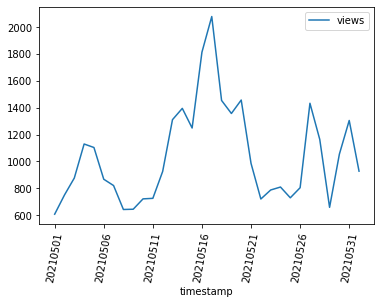

In [71]:
from matplotlib import pyplot

df1.plot(x='timestamp')
pyplot.xticks(rotation=80)
pyplot.show()

# 6. Ejercicios

1. Completar el proceso de Scraping para extraer el nombre del periodista quien escribió la noticia
2. Completar el esquema de la base de datos para insertar datos sobre los periodistas y las entidades mencionadas en las noticias
3. Completar su código para actualizar su base de datos Mongo
4. ¿Qué estrategias podriamos utilizar para obtener informaciones sobre el genero, la fecha de nacimiento y la profesión de las entidades mencionadas en las noticias? 

# 7. Caso de estudio


Queremos construir una base de datos almacenando datos las noticias (fecha, titulo, contenido, medios), las entidades mencionadas (nombre, genero, fecha de nacimiento, profesion, popularidad), los periodistas (nombre, genero) y los medios de prensa (nombre, país, dueño).

1. Proponer un modelo Entidad-Relación
2. Proponer un modelo Relacional
3. Consultas SQL con:
    - Like
    - Joins
    - Order By
    - Group By
    - Having
    - Subconsultas